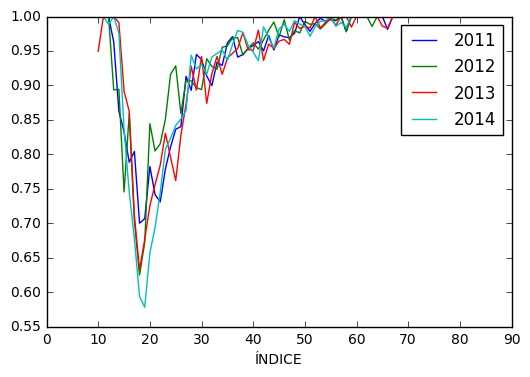

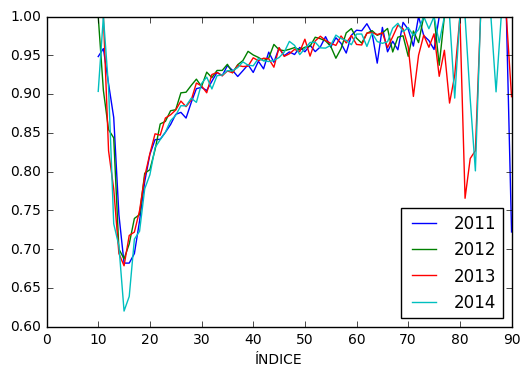

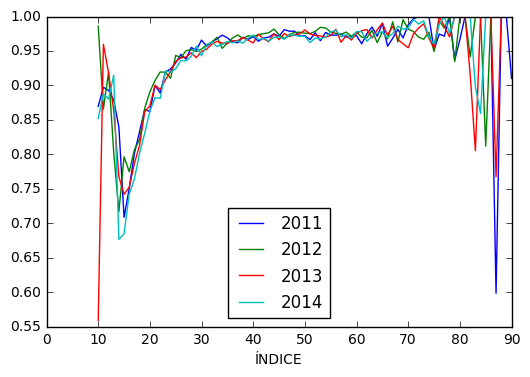

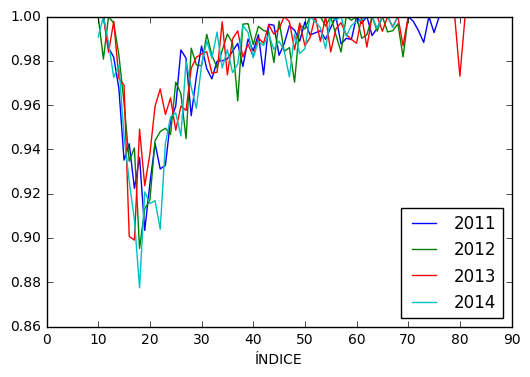

In [8]:
import pandas as pd
%matplotlib inline
import sys
sys.path.append('../')

from util.carrega_dados import get_tabelas

# Arquivo com os dados da Fazenda
arquivo = '../../datasets/FAZENDA/dados_fazenda.xlsx'
tags_populacao_pnad = ['PopPnadH','PopPnadM', 'PopUrbPnadH',
                       'PopUrbPnadM','PopRurPnadH','PopRurPnadM',
                       'PeaUrbPnadH','PeaUrbPnadM','PeaRurPnadH',
                       'PeaRurPnadM', 'PopOcupUrbPnadH', 'PopOcupUrbPnadM',
                       'PopOcupRurPnadH', 'PopOcupRurPnadM'] 

ano=2013

# Abri o arquivo
dados = pd.ExcelFile(arquivo)
pop_pnad = get_tabelas(tags_populacao_pnad, dados)  

txurb = {}
tx_crescimento_urb = 0.5

for sexo in ['H','M']:
    chave = 'txUrb'+sexo         
    txurb[chave] = pop_pnad['PopUrbPnad'+sexo]/pop_pnad['PopPnad'+sexo]
    
# Crescimento a partir de 2015
for taxa in txurb:
    for ano in range(2015,2061):
        txurb[taxa][ano] = txurb[taxa][ano-1] * (1 + tx_crescimento_urb ) 


txpart = {}
tx_crescimento_part = 0 # REVISAR
limite_crescimento = 0 # REVISAR
    
for clientela in ['Urb', 'Rur']:
    for sexo in ['H','M']:
        chave = 'txPart'+clientela+sexo         
        pea = pop_pnad['Pea'+clientela+'Pnad'+sexo]
        pia = pop_pnad['Pop'+clientela+'Pnad'+sexo]
        txpart[chave] = pea/pia

        
# Dicionario que armazena as taxas de ocupação
txocup = {}

for clientela in ['Urb', 'Rur']:
    for sexo in ['H', 'M']:
        chave = 'txOcup'+clientela+sexo
        pocup = pop_pnad['PopOcup'+clientela+'Pnad'+sexo]
        pea = pop_pnad['Pea'+clientela+'Pnad'+sexo]
        txocup[chave] = pocup/pea

        
for tx in txocup:
    txocup[tx].plot()
    

In [16]:
siglas = {'Apos' : 'Aposentadorias',
            'Apin' : 'Aposentadoria por Idade (Normal ou Usual)',
            'Apid' : 'Aposentadoria por Idade da Pessoa com Deficiência',
            'Atcn' : 'Aposentadoria por Tempo de Contribuição (Normal ou Usual)',
            'Atce' : 'Aposentadoria por Tempo de Contribuição Especial',
            'Atcp' : 'Aposentadoria por Tempo de Contribuição do(a) Professor(a)',
            'Atcd' : 'Aposentadoria por Tempo de Contribuição da Pessoa com Deficiência',
            'Ainv' : 'Aposentadoria por Invalidez',
            'Aux' : 'Auxílios',
            'Auxd' : 'Auxílio-Doença',
            'Auxa' : 'Auxílio-Acidente',
            'Auxr' : 'Auxílio-Reclusão',
            'Ce' : 'Cessações',
            'Co' : 'Concessões',
            'Es' : 'Estoque',
            'SalMat' : 'Salário-Maternidade',
            'PensTot' : 'Pensões por Morte Totais',
            'PensTipoA' : 'Pensões Tipo A',
            'PensTipoB' : 'Pensões Tipo B',
            'LoasIdo' : 'Amparo Assistencial da Lei Orgânica da Previdência Social (LOAS) ao Idoso',
            'LoasDef' : 'Amparo Assistencial da LOAS da Pessoa com Deficiência',
            'RmvIda' : 'Renda Mensal Vitalícia (RMV) por Idade',
            'RmvInv' : 'Renda Mensal Vitalícia (RMV) por Invalidez',
            'Client' : 'Clientela',
            'Rur' : 'Clientela Rural',
            'Urb' : 'Clientela Urbana',
            'Piso' : 'Clientela Urbana Piso Previdenciário',
            'Acim' : 'Clientela Urbana Acima do Piso Previdenciário',
            'Sm' : 'Clientela Urbana Contribuinte Salário Mínimo',
            'AcimSm' : 'Clientela Urbana Contribuinte Acima do Salário Mínimo',
            'Seg' : 'Segurados',
            'H' : 'Homens',
            'M' : 'Mulheres',
            'Pop' : 'População',
            'Mort' : 'Mortalidade',
            'Txmortimpl' : 'Taxa de Mortalidade Implícita da População'

            }            



In [17]:
sigla['Es']

'Estoque'